# Домашнее задание: Кластеризация

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 09.08.2021

__Дедлайн:__ 23.08.2021

### О задании

Часть 1 содержит практическое задание на реализацию метода KMeans.

Часть 2 содержит практическое задание на применение методов KMeans и Иерархических методов кластеризации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках). Максимально допустимая оценка за работу — 10 баллов. Обратите внимание, что только за реализацию функций без подтверждения их корректной работы оценка выставляться не будет.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 4 баллов.

При сдаче после указанного срока сдачи от выставленной оценки за работу будет отниматься 0.5 балла за каждые 24 часа просрочки.

### Формат сдачи

Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_clustering.ipynb, где Username — ваша фамилия на латинице (например, Ivanov_clustering.ipynb). Далее отправьте этот файл на почту NHryshchuk@ibagroup.eu с темой письма "hw_clustering.%FULL_NAME%" с указанными выше условиями.

# Часть 1. K-means своими руками (5 баллов)

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (8, 5)

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [3]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

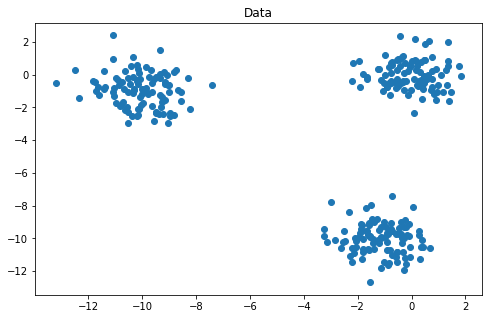

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.show()

## Задание 1 (2 балла)

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [5]:
from sklearn.metrics import pairwise_distances

In [6]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # your code here
    y =[]
    dist_table = pairwise_distances(X, centers)
    for obj_dist in dist_table:
        y.append(np.argmin(obj_dist))
    return y

centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

#y = compute_clusters(X, centers)
#indices = [index for index, element in enumerate(y) if element == 1]
#print(X[indices])

## Задание 2 (3 балла)

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [7]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj = X.shape[0]
        num_feat = X.shape[1]
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.randint(low=0, high=self.n_clusters, size=num_feat, dtype=int)
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = np.empty([self.n_clusters, num_feat])
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                indices = [index for index, element in enumerate(y) if element == cl]
                self.centers[cl] = sum(X[indices])/(len(indices) + 0.00001)
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = compute_clusters(X, self.centers)
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки

        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        # your code here
        y_pred = compute_clusters(X, self.centers)
        return y_pred

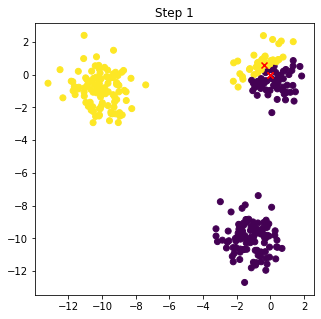

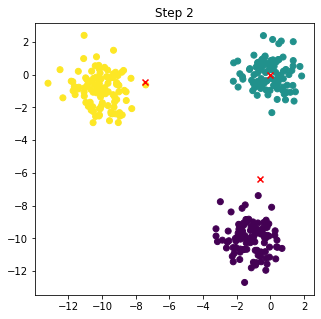

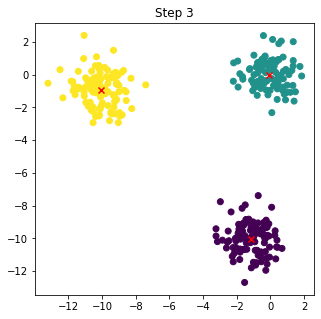

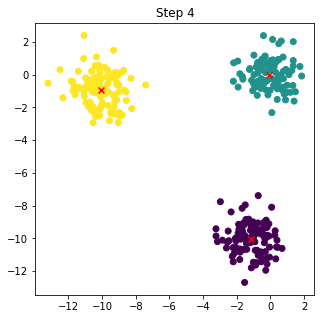

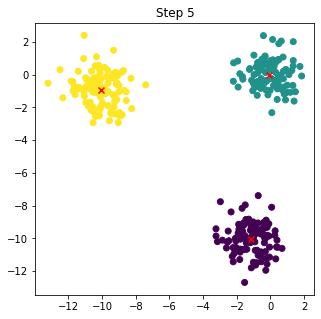

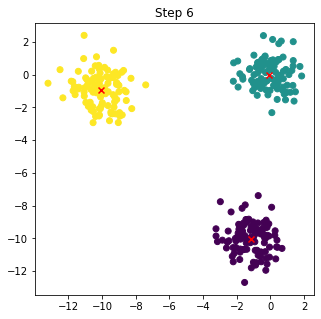

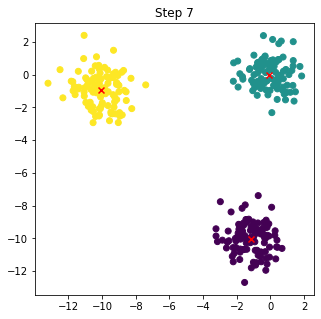

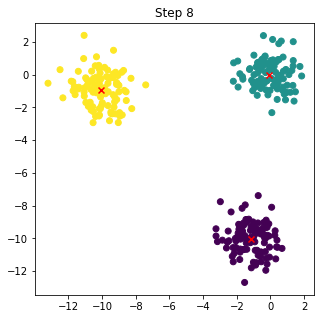

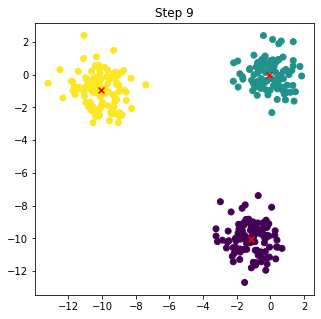

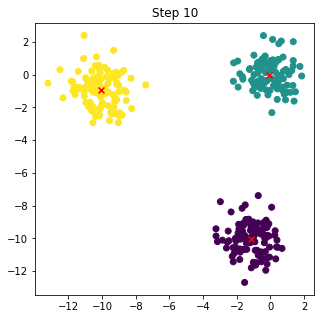

In [8]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

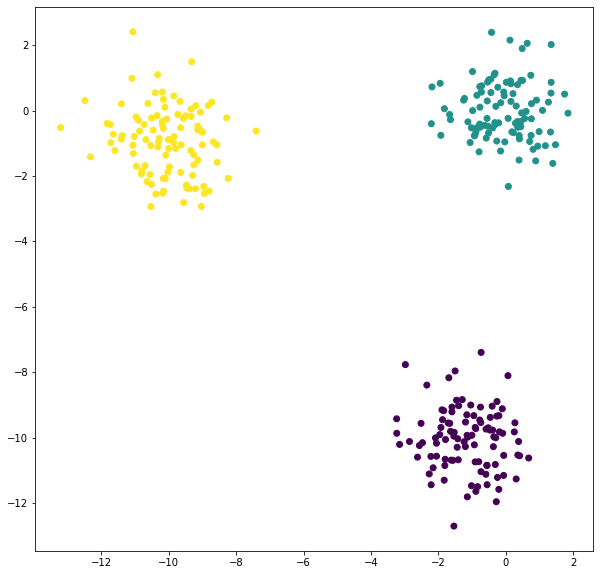

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 2. Clustering of countries (5 баллов)

### Основная цель: нужно выделить страны, которые остро нуждаются в помощи.

#### Данные включают:
    country : Название страны
    child_mort : Смерть детей в возрасте до 5 лет на 1000 рожденных
    exports : Экспорт товаров и услуг на душу населения. В процентах от ВВП на душу населения
    health : Общие расходы на здравоохранение на душу населения. В процентах от ВВП на душу населения 
    imports : Импорт товаров и услуг на душу населения. В процентах от ВВП на душу населения
    income : Чистый доход на человека
    inflation : Измерение годового темпа роста общего ВВП
    life_expec : Среднее количество лет, которое прожил бы новорожденный ребенок, если нынешняя структура смертности останется прежней
    total_fer : Количество детей, которые родятся у каждой женщины, если текущие возрастные коэффициенты рождаемости останутся прежними
    gdpp : ВВП на душу населения. Рассчитывается как отношение общего ВВП к общей численности населения

# Задание 1 (1 балл)

Импорт и очистка данных: проверьте данные на наличие нулевых значений, с помощью визуализации данных проверьте на наличие выбросов, корреляции между признаками. Для удаления выбросов воспользуйтесь функцией outlier_treatment.   

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [11]:
import pandas as pd
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
def show_numeric_correlogram(df):
    numeric_features = df.select_dtypes('number').columns

    mask = np.triu(np.ones_like(numeric_features, dtype=bool))

    figure, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(df[numeric_features].corr(),
                vmin=-1, vmax=1, cmap='RdBu',
                annot=True, center=0, mask = mask)
    plt.title('Numeric values dataset correlogram', fontsize=20)
    plt.show()

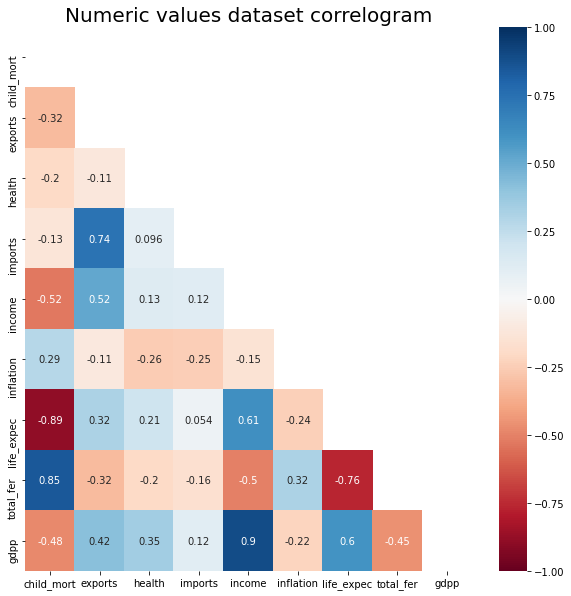

In [14]:
import seaborn as sns
show_numeric_correlogram(df)

In [15]:
def vizualize_outliners(df):
    columns = df.select_dtypes('number').columns
    COEFF = 2
    fig, ax = plt.subplots(len(df.columns)//COEFF,COEFF,figsize=(12, 10))
    for index, column in enumerate(columns):
        sns.boxplot(x= df[column], 
                     ax=ax[index // COEFF][index % COEFF])
        #ax[index // COEFF][index % COEFF].set_xlabel(column)
        ax[index // COEFF][index % COEFF].set_ylabel(column)

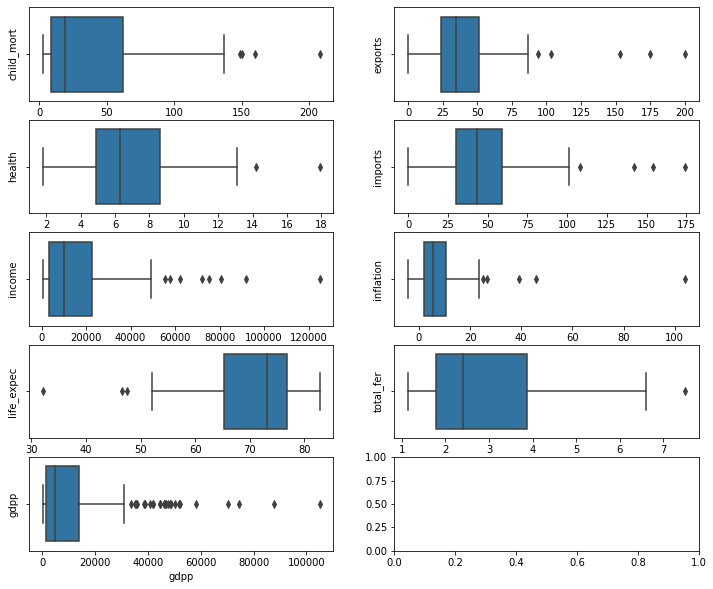

In [16]:
vizualize_outliners(df)

In [17]:
def outlier_treatment(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [18]:
to_treat = ['inflation', 'exports', 'imports', 'health', 'gdpp']
for col in to_treat:
    df = outlier_treatment(df, col)

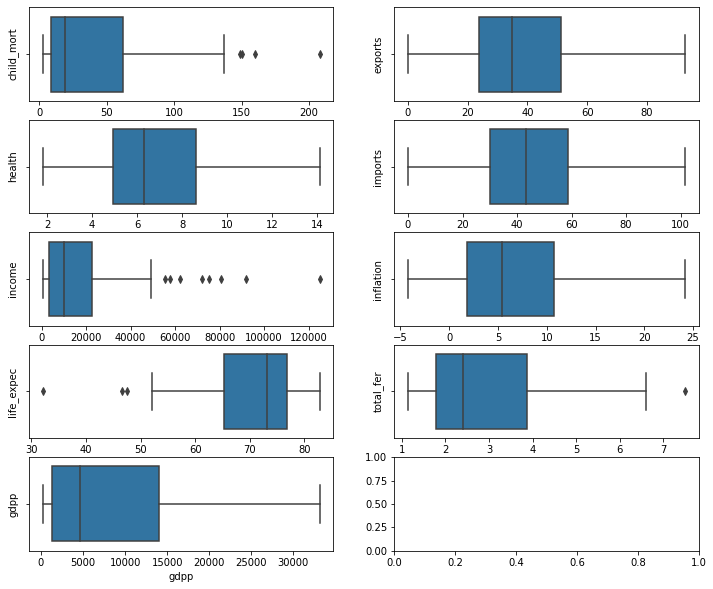

In [19]:
vizualize_outliners(df)

*Я словил диссонанс в процессе очистки данных от выбросов, ведь, если их не почистить, то такие страны или в некотором случае отдельная страна будет являться отдельным кластером. Но поскольку задача является в определении самых сирых и убогих, я не стал слишком сильно их сглаживать, вычищая лишь коррелирующие выборсы*

# Задание 2 (1 балл)

Нормализуйте все некатегориальные переменные. Выберете наиболее подходящий метод нормализации или стандартизации данных.(sklearn.preprocessing)

In [20]:
#from sklearn.preprocessing import MinMaxScaler
#num_columns = df.select_dtypes('number').columns
#scaled_df = pd.DataFrame(df['country'])
#scaled_df[num_columns] = MinMaxScaler().fit_transform(df[num_columns])

In [31]:
#Standardazing
from sklearn.preprocessing import StandardScaler
num_columns = df.select_dtypes('number').columns
standardized_df = pd.DataFrame(df['country'])
standardized_df[num_columns] = StandardScaler().fit_transform(df[num_columns])

In [32]:
#Normalization
from sklearn.preprocessing import Normalizer
num_columns = df.select_dtypes('number').columns
normalized_df = pd.DataFrame(df['country'])
normalized_df[num_columns] = Normalizer().fit_transform(df[num_columns])

# Задание 3 (1 балл)

Попробуйте K-mean кластеризацию. Методом локтя с помощью метрики силуэт определить оптимальное количество кластеров. Для лучшей интерпретируемости результатов получившуюся кластерную метку добавьте к первоначальным немасштабируемым данным. 

*Забавно, но что в русскоязычных, что в западных статьях `метод локтя` ассоциируют с метрикой `Within-Cluster-Sum of Squared Errors (WSS)` и противопоставляют `силуэт`'у. Да и как будет показано на графике, для определения оптимального исла кластеров для последнего больше подойдёт `метод детской мазни`:)*

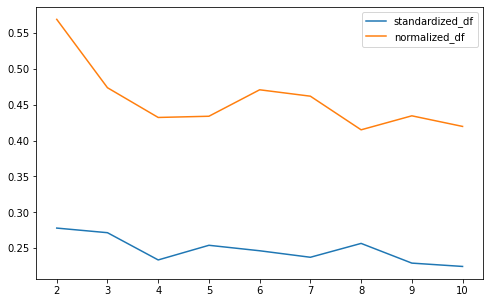

In [58]:
from sklearn.metrics import silhouette_score

def count_silhouette(df, kmax = 10):
    k_points = []
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k, n_init=10).fit(df[num_columns])
        labels = kmeans.labels_
        k_points.append(k)
        sil.append(silhouette_score(df[num_columns], labels, metric = 'euclidean'))
    
    return k_points, sil
    
#silhuette calculations    
k_ponts, st_sil = count_silhouette(standardized_df)
k_ponts, norm_sil = count_silhouette(normalized_df)

#plotting
plt.plot(k_ponts, st_sil, label = 'standardized_df')
plt.plot(k_ponts, norm_sil, label = 'normalized_df')
plt.legend()
plt.show()

In [75]:
#getting clusters:
model = KMeans(n_clusters = 6)
lables = model.fit_predict(normalized_df[num_columns])
example_df = df
example_df['lables'] = lables

# cluster 
print(example_df['lables'].value_counts())

1    47
4    37
0    33
3    31
5    17
2     2
Name: lables, dtype: int64


In [68]:
# perhaps, a terrible fate or just inaccuracy of KMeans and my preprocessing
mask_Bel = example_df['country'] == 'Belarus'
mask_Ven = example_df['country'] == 'Venezuela'
mask_Afg = example_df['country'] == 'Afghanistan'
Bel_stat = example_df[mask_Bel]
Ven_stat = example_df[mask_Ven]
Afg_stat = example_df[mask_Afg]


pd.concat([Bel_stat, Ven_stat, Afg_stat], axis= 0)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,lables
14,Belarus,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030.0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,24.16,75.4,2.47,13500.0,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553.0,1


*Вообще, на любых данных более подходящим количеством кластеров будет- 2, но в таком случае помощь понадобится почти что всем странам в мире, а это не ок. Возможно, дело в том, что я не лучшим образом обработал данные под эту задачу, в таком случае очень надеюсь на обратную связь с указаниями, как можно было бы улучшить класстеризацию так, чтобы Беларус не попадала к Афганистану, а Венесуэла не прыгала до уровня Великобритании. Если это, конечно, возможно с KMeans.*

# Задание 4 (1 балл)

Попробуйте иерархическую кластеризацию с тем же количеством кластеров, определенных в K-mean при этом подберите оптимальный метод расчета расстояний между кластерами.

# Задание 5 (1 балл)

Сравните полученные результаты методом K-mean и иерархической кластеризацией, используя метрику силуэт. Интерпретируйте полученные этими двумя методами результаты. Не забывайте основная цель было найти страны, которые остро нуждаются в помощи (удалось вам получить кластер с таким списком стран?, если да, то по каким признакам кластер выделился и выведите топ 10 стран, которые нуждаются в помощи). 